In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
np.random.seed(857)

In [4]:
data = ImageDataBunch.from_folder(path='./art-text-plant/', ds_tfms=[get_transforms()[0],get_transforms()[0]], size=256, bs=32)

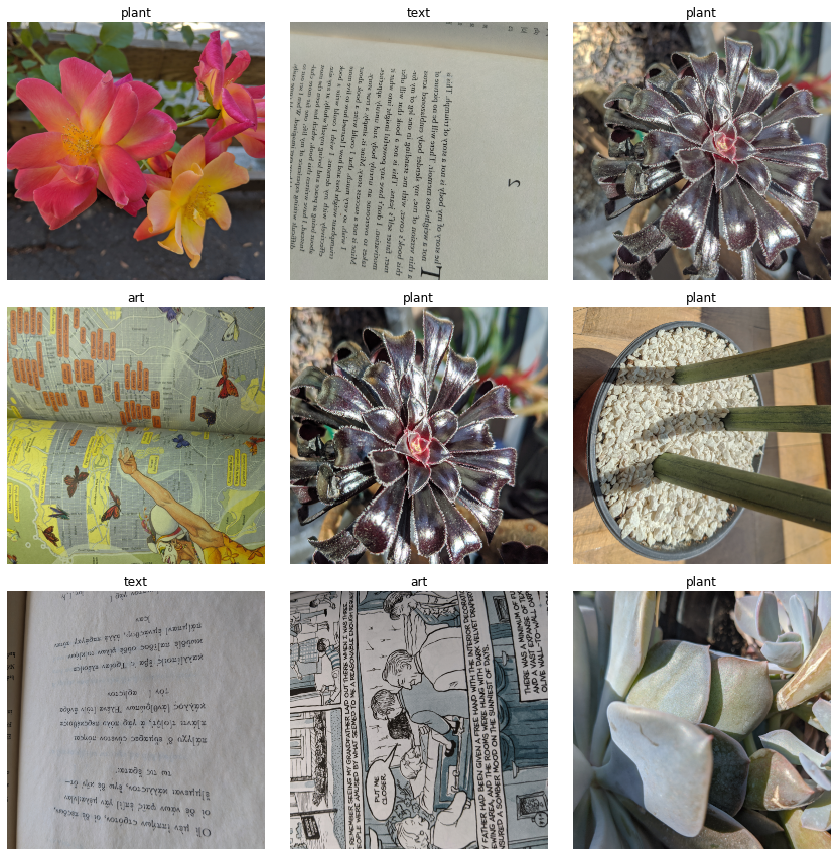

In [5]:
data.show_batch(rows=3)

In [6]:
learn = cnn_learner(data, models.mobilenet_v2, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)
learn.unfreeze()


epoch,train_loss,valid_loss,error_rate,time
0,0.760114,1.098463,0.303030,00:38
1,0.355111,0.117442,0.045455,00:39
2,0.219687,0.027407,0.000000,00:39
3,0.152739,0.021249,0.000000,00:40


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


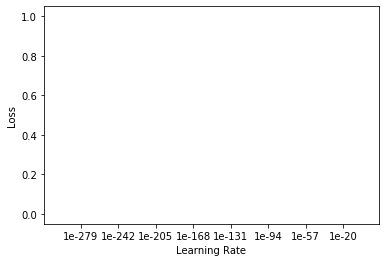

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(16, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.000011,0.033866,0.000000,00:40
1,0.000018,0.019298,0.000000,00:42
2,0.000063,0.009581,0.000000,00:44
3,0.000055,0.006082,0.000000,00:43
4,0.000045,0.012111,0.000000,00:44
5,0.000035,0.008993,0.000000,00:44
6,0.000029,0.004817,0.000000,00:44
7,0.000056,0.003120,0.000000,00:44
8,0.000046,0.002322,0.000000,00:45
9,0.000040,0.002199,0.000000,00:44


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

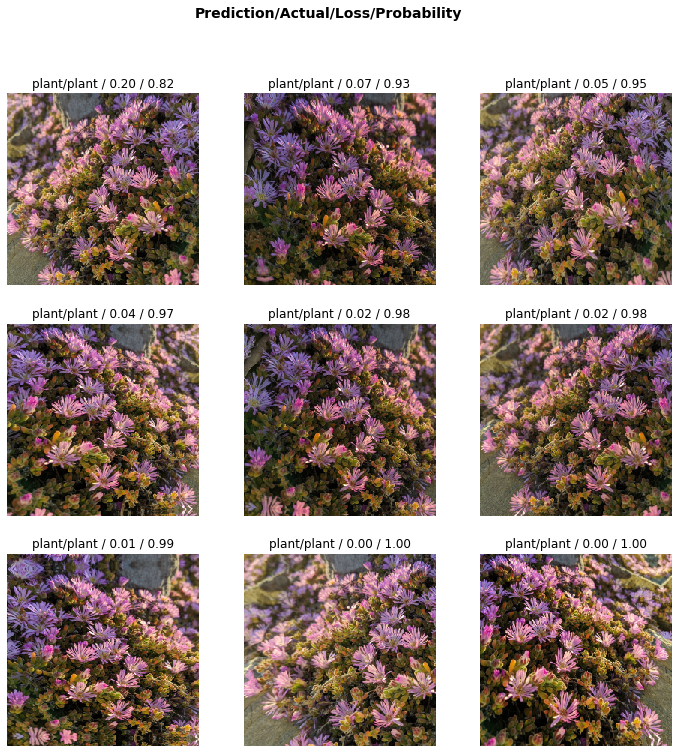

In [13]:
interp.plot_top_losses(9)

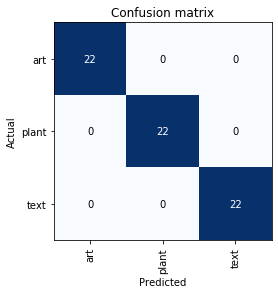

In [12]:
interp.plot_confusion_matrix()

In [14]:
learn.save('./art-text-plant-to11', with_opt=False)

In [16]:
learn.export()

In [13]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do